Dataset : "https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data"

Таблица содержит информацию различных факторов, влияющих на успеваемость учащихся на экзаменах.
Она включает информацию об учебных привычках, посещаемости, участии родителей и других аспектах, влияющих на успеваемость.

Задача : По данным из таблицы решить задачу классификации категории Exam_Score на основе параметров из таблицы. Категория принимает значения от 1 до 100.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['StudentPerformanceFactors.csv']))

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


## Характеристики таблицы

In [4]:
df.shape

(6607, 20)

In [ ]:
df.sample(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
234,33,61,Medium,Medium,No,7,99,High,Yes,2,Medium,High,Public,Neutral,3,No,College,Near,Female,70
3843,12,68,Medium,High,No,8,88,High,Yes,3,Low,Medium,Public,Negative,3,No,Postgraduate,Moderate,Female,64
1493,21,97,Medium,High,Yes,7,99,High,Yes,1,Medium,High,Public,Neutral,1,No,Postgraduate,Moderate,Male,74
1920,8,99,Low,High,Yes,6,83,High,Yes,2,Medium,High,Public,Positive,4,Yes,Postgraduate,Near,Male,70
232,20,80,Medium,High,No,5,94,Medium,Yes,0,Low,Low,Private,Positive,4,Yes,Postgraduate,Moderate,Female,67
6414,22,63,Low,Low,Yes,7,94,Medium,Yes,0,Medium,NaN,Public,Negative,3,Yes,High School,Far,Male,61
119,25,72,High,High,Yes,8,94,Low,Yes,2,Low,Medium,Private,Positive,4,No,College,Moderate,Female,70
5512,24,85,High,Low,Yes,9,89,Medium,Yes,1,Low,Medium,Public,Positive,2,No,Postgraduate,Moderate,Male,70
6534,16,80,Medium,Medium,No,9,73,Medium,Yes,2,Medium,Medium,Private,Negative,4,No,College,Near,Male,66
4086,25,69,Medium,Medium,Yes,8,64,Medium,Yes,1,High,Low,Public,Negative,3,No,Postgraduate,Moderate,Female,66


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

  ### Признаки :
  0. **Hours_Studied** - Количество часов, потраченных на учебу в неделю.
  1. **Attendance** -	Процент посещенных занятий.
  2. **Parental_Involvement** -	Уровень участия родителей в образовании ученика
(Low, Medium, High).
  3. **Access_to_Resources** - Доступ к обучающим ресурсам (Low, Medium, High).
  4. **Extracurricular_Activities**	- Участие во внеклассных мероприятиях (Yes, No).
  5. **Sleep_Hours** - Среднее количество часов сна за ночь.
  6. **Previous_Scores** - Результат предыдущего экзамена.
  7. **Motivation_Level**	- Мотивация (Low, Medium, High).
  8. **Internet_Access**	- Доступ к интернету (Yes, No).
  9. **Tutoring_Sessions** -	Количество посещенных занятий с репетиторами в месяц.
  10. **Family_Income**	- Финансовое состояние семьи (Low, Medium, High).
  11. **Teacher_Quality**	- Качество учителей (Low, Medium, High).
  12. **School_Type**	- Тип школы (Public, Private).
  13. **Peer_Influence**	- Влияние сверстников на успеваемость (Positive, Neutral, Negative).
  14. **Physical_Activity**	- Среднее количество часов физической активности в неделю.
  15. **Learning_Disabilities**	- Наличие проблем с обучением (Yes, No).
  16. **Parental_Education_Level** - Самый высокий уровень образования родителей (High School, College, Postgraduate).
  17. **Distance_from_Home** - Расстояние от дома до школы (Near, Moderate, Far).
  18. **Gender** - Гендер (Male, Female).
  19. **Exam_Score**	- Финальный результат экзамена.

# Обработка пропущенных значений

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df=df.dropna()
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df=df.drop_duplicates()
df.shape

(6378, 20)

# Мы удалили объекты, где хотя бы одно поле null , также удалили дупликаты. Всего удалили 229 объектов. Это составляет 3,5 % от всей выборки

# **Обработка категориальных признаков**

In [56]:

cat_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
df[cat_columns] = df[cat_columns].astype('category')
df['Exam_Score'] = df['Exam_Score'].astype('int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [57]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [58]:
df.describe(include=['category'])

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


# **Немного визуализации**

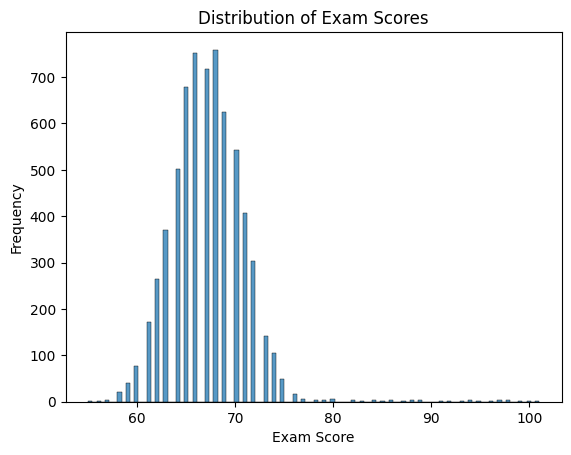

In [59]:
sns.histplot(data=df, x='Exam_Score')

plt.title('Distribution of Exam Scores')

plt.xlabel('Exam Score')

plt.ylabel('Frequency')

plt.show()

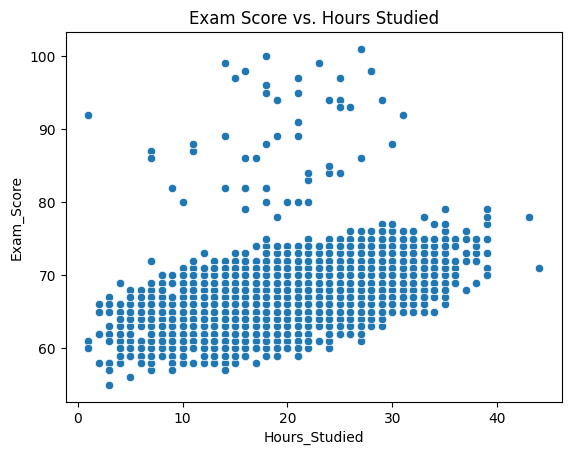

In [60]:
import matplotlib.pyplot as plt



sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')

plt.title('Exam Score vs. Hours Studied')

plt.show()

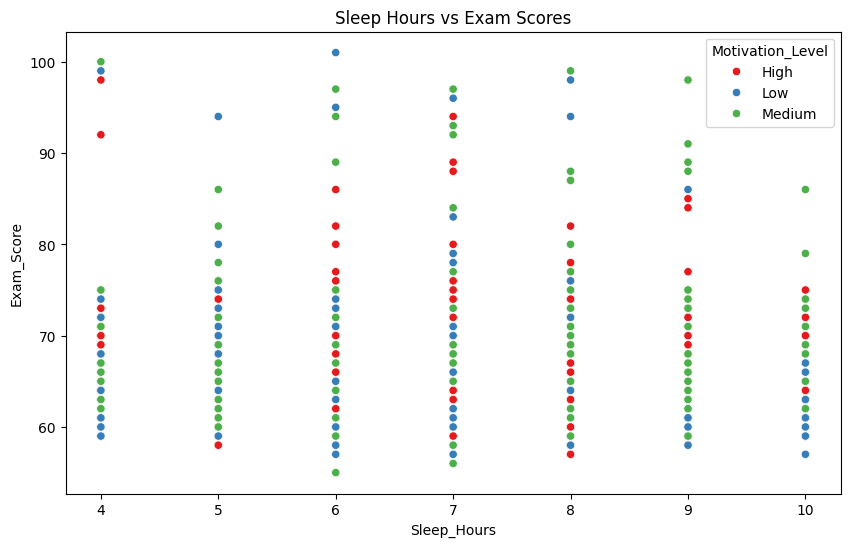

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=df, hue='Motivation_Level', palette='Set1')
plt.title('Sleep Hours vs Exam Scores')
plt.show()

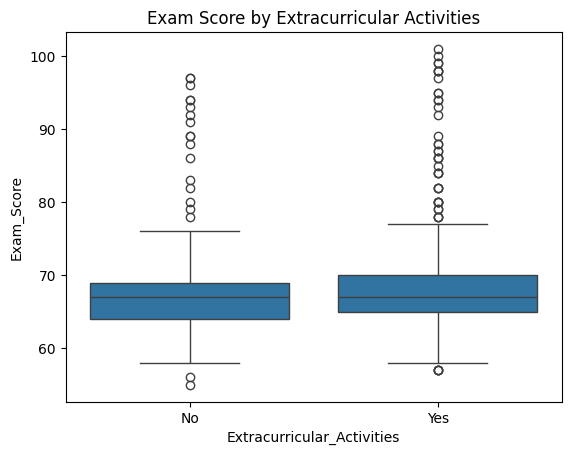

In [62]:
import seaborn as sns

import matplotlib.pyplot as plt



sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score')

plt.title('Exam Score by Extracurricular Activities')

plt.show()

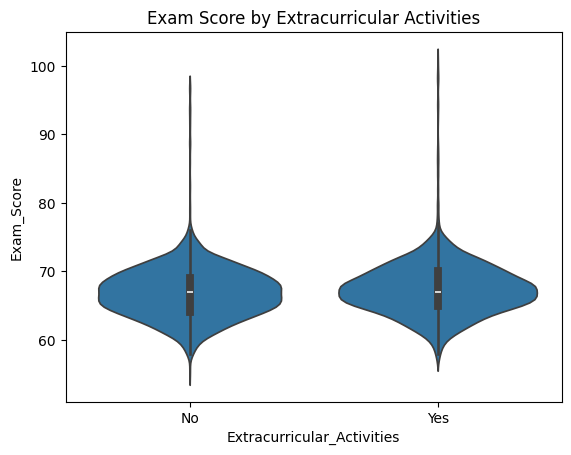

In [9]:
import matplotlib.pyplot as plt



sns.violinplot(data=df, x='Extracurricular_Activities', y='Exam_Score')

plt.title('Exam Score by Extracurricular Activities')

plt.show()

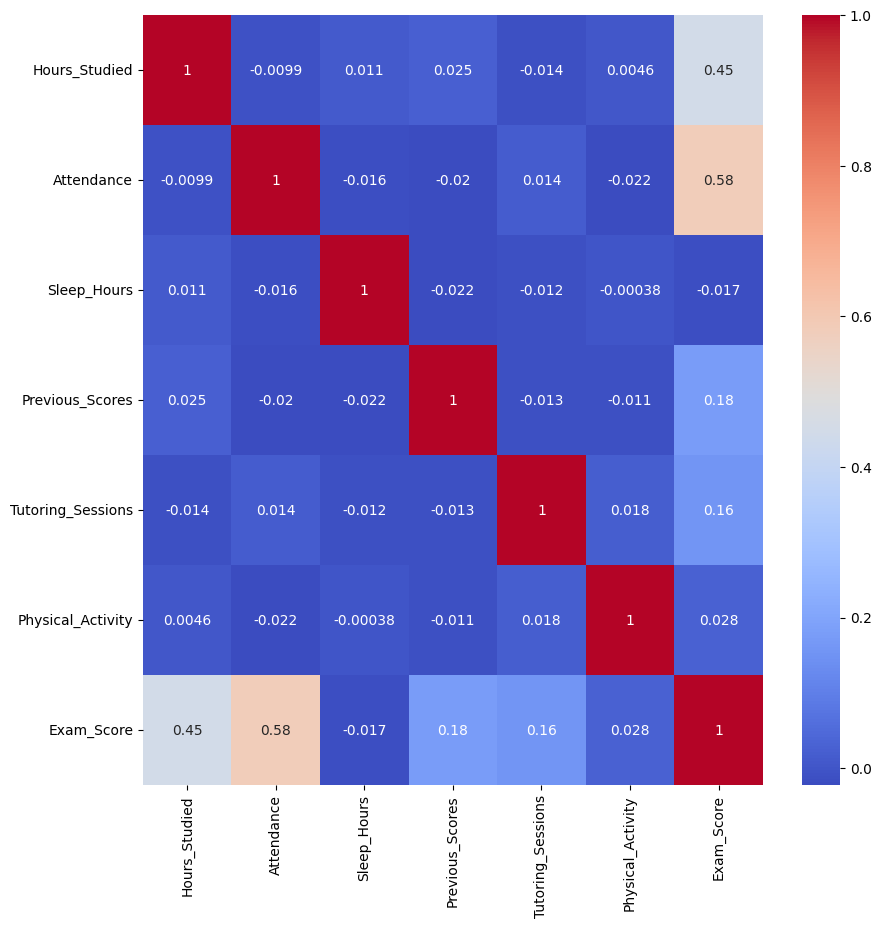

In [63]:
Correlation_Matrix=df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(Correlation_Matrix,annot=True,cmap='coolwarm')
plt.show()

### **Подготовка и нормализация данных**

Произведем кодирование категориальных признаков

In [93]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()
label_encoder = LabelEncoder()
needed_encoding = cat_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
for i in needed_encoding:
    data[i]=label_encoder.fit_transform(data[i])
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70



Избавимся от некоторых столбцов в таблице

In [94]:
data = data.drop(['Access_to_Resources', 'School_Type','Extracurricular_Activities', 'Internet_Access', 'Peer_Influence', 'Learning_Disabilities', 'Distance_from_Home', 'Gender'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Hours_Studied             6607 non-null   int64
 1   Attendance                6607 non-null   int64
 2   Parental_Involvement      6607 non-null   int64
 3   Sleep_Hours               6607 non-null   int64
 4   Previous_Scores           6607 non-null   int64
 5   Motivation_Level          6607 non-null   int64
 6   Tutoring_Sessions         6607 non-null   int64
 7   Family_Income             6607 non-null   int64
 8   Teacher_Quality           6607 non-null   int64
 9   Physical_Activity         6607 non-null   int64
 10  Parental_Education_Level  6607 non-null   int64
 11  Exam_Score                6607 non-null   int64
dtypes: int64(12)
memory usage: 619.5 KB



Признаки приведем к нулевому среднему и единичному среднеквадратичному отклонению

In [95]:
num_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
data[num_columns] = (data[num_columns] - data[num_columns].mean(axis = 0)) / data[num_columns].std(axis = 0)
data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Physical_Activity,Parental_Education_Level,Exam_Score
0,0.504903,0.348349,1,-0.019794,-0.143789,1,-1.213843,1,2,0.031409,1,-0.060574
1,-0.162810,-1.383631,1,0.661349,-1.116026,1,0.411420,2,2,1.001124,0,-1.602809
2,0.671832,1.560735,2,-0.019794,1.106230,2,0.411420,2,2,1.001124,2,1.738701
3,1.506473,0.781344,1,0.661349,1.592348,2,-0.401211,2,2,1.001124,1,0.967584
4,-0.162810,1.041141,2,-0.700937,-0.699353,2,1.224051,2,0,1.001124,0,0.710544


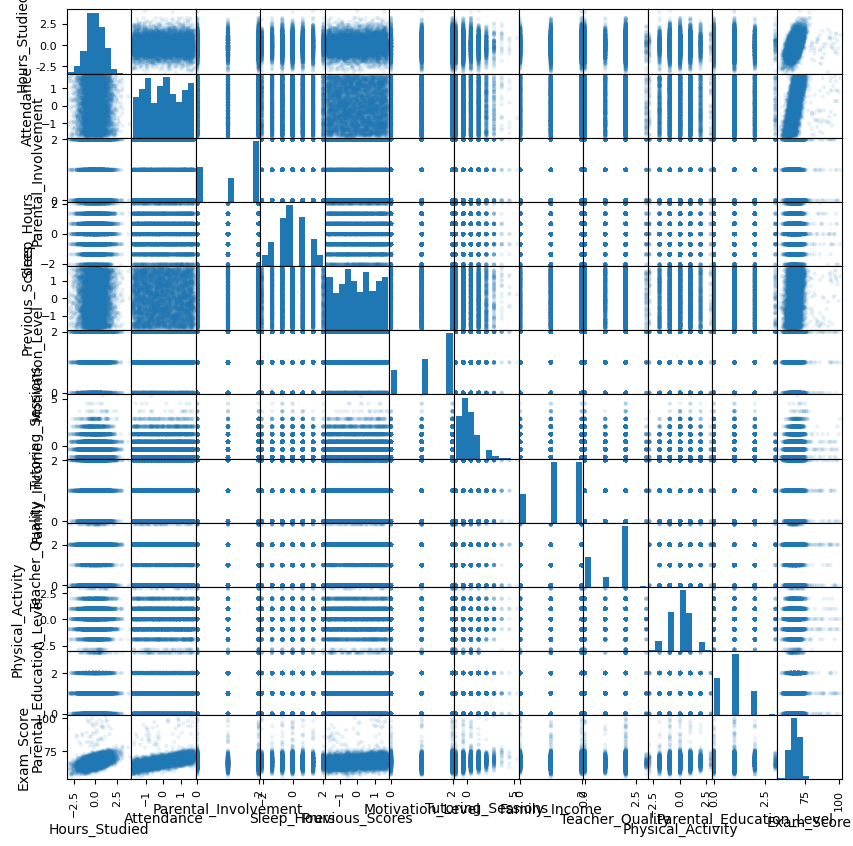

In [78]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.1, figsize = (10, 10))
pass

**Разбиение данных на обучающую и тестовую выборки**

In [80]:
X=np.array(data[['Hours_Studied', 'Attendance', 'Parental_Involvement',	'Sleep_Hours',	'Previous_Scores',
'Motivation_Level', 'Tutoring_Sessions',	'Family_Income',	'Teacher_Quality',
'Physical_Activity', 'Parental_Education_Level']])
y=np.array(data['Exam_Score'])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

***Модель***

Будем использовать **KNeighborsRegressor** алгоритм. Протестируем разные гиперпараметры и найдем самый оптимальный

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': list(range(3, 11))}
knr = KNeighborsRegressor()
clf = GridSearchCV(knr, parameters, verbose=2, cv=4)
clf.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=3; total time=   0.1s
[CV] END ......................................n_neighbors=4; total time=   0.1s
[CV] END ......................................n_neighbors=4; total time=   0.1s
[CV] END ......................................n_neighbors=4; total time=   0.1s
[CV] END ......................................n_neighbors=4; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_neighbors=5; total time=   0.1s
[CV] END ......................................n_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]}, verbose=2)

**Выведем значения ошибок**

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

def regression_report(y_true, y_pred):

    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)

    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]

    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')

    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')

y_pred = clf.predict(X_test)
regression_report(y_test, y_pred)

Metrics for regression:
      mean absolute error:                1.535
    median absolute error:                1.100
       mean squared error:                8.045
                max error:               30.800
                 r2 score:                0.512
 explained variance score:                0.517

Percentiles:
                        5:               -2.700
                       25:               -1.000
                       50:                0.100
                       75:                1.300
                       95:                3.000


*Наилучшее значения достигаются при n_neighbors = 10*

In [91]:
clf.best_params_

{'n_neighbors': 10}